<a href="https://colab.research.google.com/github/michellehkim280/1stproject/blob/main/MichelleCaraSaveTheDay_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Packages and such

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

In [266]:
# Below is the professor's code chunk for reading in the data
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

In [267]:
match = [col for col in df.columns if 'educ' in col]
print("Column names:", match)

Column names: ['educ', 'paeduc', 'maeduc', 'speduc', 'coeduc', 'nateduc', 'nateducy', 'nateducz', 'educop', 'coneduc', 'coneducy', 'sexeduc', 'educ1', 'educ2', 'educ3', 'educ4', 'educ5', 'sppaeduc', 'spmaeduc', 'kdeduc1', 'kdeduc2', 'kdeduc3', 'kdeduc4', 'kdeduc5', 'kdeduc6', 'kdeduc7', 'kdeduc8', 'kdeduc9', 'sbeduc', 'voleduc', 'moneduc', 'hrseduc', 'giveduc', 'toteduc', 'valeduc', 'educ30', 'inteduc', 'opeduc', 'richeduc', 'educemp', 'reducemp', 'payeduc', 'immeduc', 'chldeduc', 'sei10educ', 'pasei10educ', 'masei10educ', 'spsei10educ', 'cosei10educ']


In [268]:
unique_responses = df['coninc'].value_counts()
print("Unique Responses:")
print(unique_responses)

na_count = df['coninc'].isna().sum()
# Print the number of NAs
print(f"Number of NAs in '{'coninc'}': {na_count}")

Unique Responses:
168736.29696    702
45360.00000     671
67200.00000     575
55440.00000     554
36960.00000     492
               ... 
3447.00000       10
4556.50000        9
3737.25000        9
4213.00000        8
3613.50000        8
Name: coninc, Length: 203, dtype: int64
Number of NAs in 'coninc': 2728


# DATA CLEANING CODE BEGINS BELOW!!!!!

Age Cleaning

In [244]:
# Dropping any rows where the age of person is missing. As documented in codebook, only 5% of count did not answer
df = df.dropna(subset=['age'])

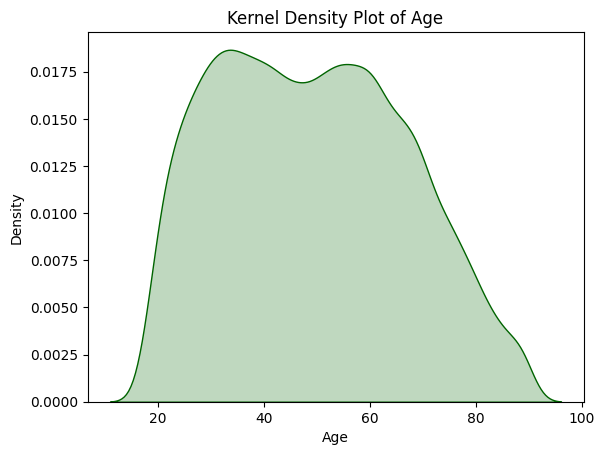

In [270]:
sns.kdeplot(data=df['age'], fill=True, color='darkgreen')
plt.title('Kernel Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Income Cleaning

In [271]:
df['coninc'] = df['coninc'].round(2)

In [ ]:
df.rename(columns={'coninc': 'income'}, inplace=True)

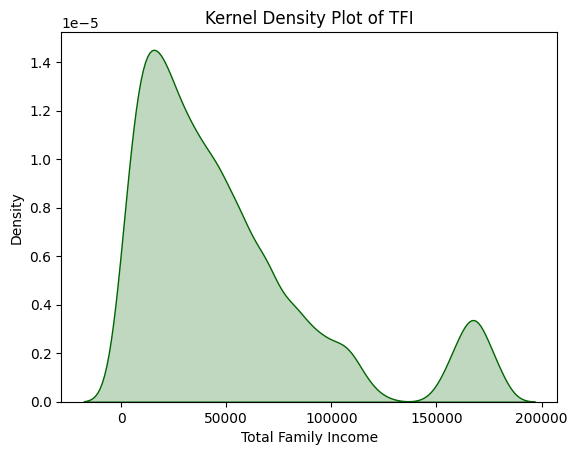

In [272]:
sns.kdeplot(data= df['coninc'], fill=True, color='darkgreen')
plt.title('Kernel Density Plot of TFI')
plt.xlabel('Total Family Income')
plt.ylabel('Density')
plt.show()

Happiness Rank Cleaning

In [273]:
# Converting to ordered categorical type with predefined categories (categories from codebook
# and replacing any missing values in this column with the category 'unanswered'
# This ensures consistent data categorization and handles missing data

categories = ['pretty happy', 'very happy', 'not too happy', 'unanswered']
df['happy'] = pd.Categorical(df['happy'], categories=categories, ordered=True)
# Replace NAs in 'happy' column with 'unanswered'
df['happy'].fillna('unanswered', inplace=True)

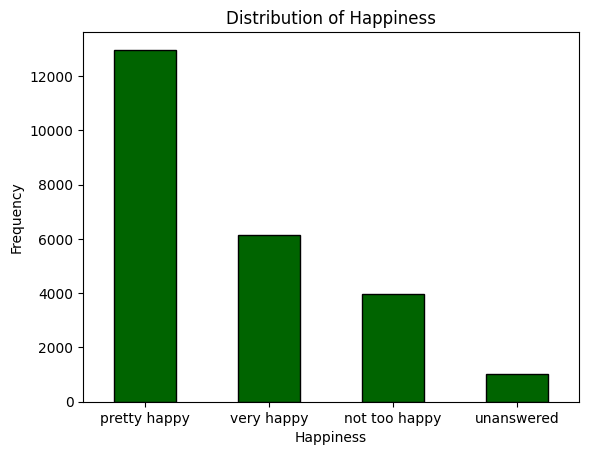

In [274]:
df['happy'].value_counts().sort_index().plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title('Distribution of Happiness')
plt.xlabel('Happiness')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

Health Rank Cleaning

In [275]:
# Same reasoning as above
cat_health = ['good', 'excellent', 'fair', 'poor', 'unanswered']
df['health'] = pd.Categorical(df['health'], categories=cat_health, ordered=True)
# Replace NAs in 'health' column with 'unanswered'
df['health'].fillna('unanswered', inplace=True)

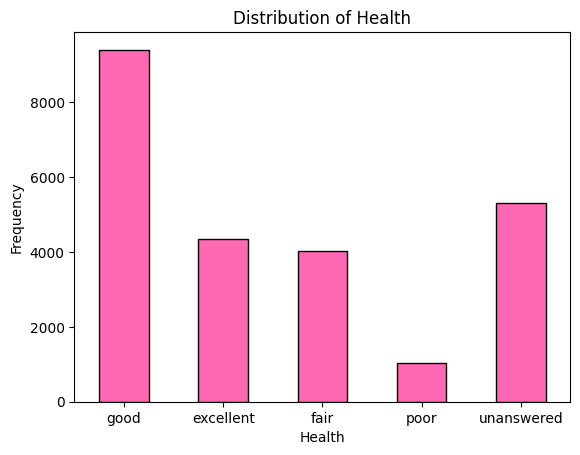

In [276]:
df['health'].value_counts().sort_index().plot(kind='bar',
                                              color='hotpink', edgecolor='black')
plt.title('Distribution of Health')
plt.xlabel('Health')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

Sex Cleaning

In [277]:
# Same reasoning as above, not including other genders as we are following codebook
cat_sex = ['female', 'male', 'unanswered']
df['sex'] = pd.Categorical(df['sex'], categories=cat_sex, ordered=True)
# Replace NAs in 'sex' column with 'unanswered'
df['sex'].fillna('unanswered', inplace=True)

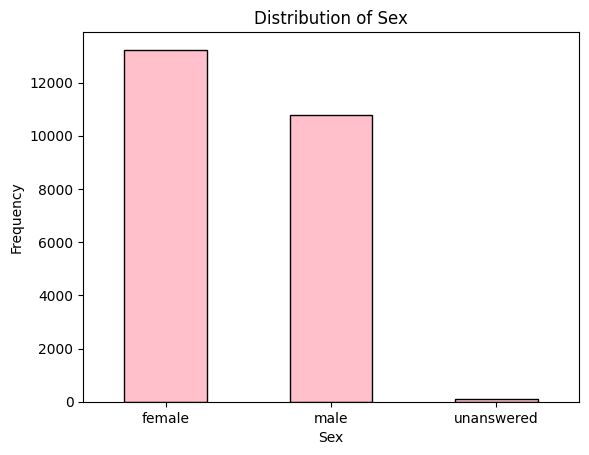

In [278]:
df['sex'].value_counts().sort_index().plot(kind='bar',
                                              color='pink', edgecolor='black')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

Marital Status Cleaning

In [279]:
# Marital status cleaning
cat_marital = ['married', 'never married', 'divorced', 'widowed', 'separated',
               'unanswered']
df['marital'] = pd.Categorical(df['marital'], categories=cat_marital, ordered=True)
# Replace NAs in 'marital' column with 'unanswered'
df['marital'].fillna('unanswered', inplace=True)

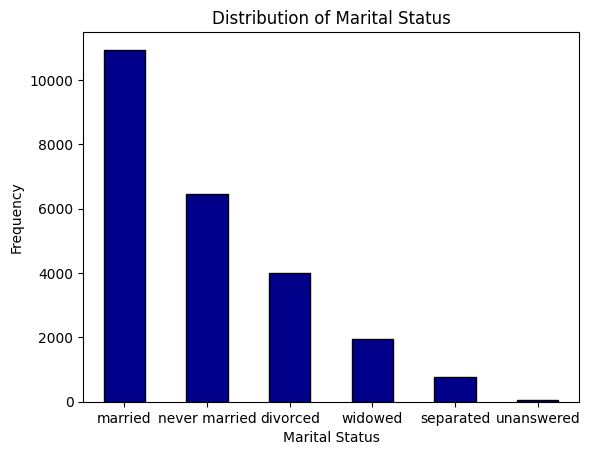

In [280]:
df['marital'].value_counts().sort_index().plot(kind='bar',
                                              color='darkblue', edgecolor='black')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [281]:
# Degree cleaning
cat_deg = ['less than high school', 'high school', 'associate/junior college',
           "bachelor's", 'graduate',
               'unanswered']
df['degree'] = pd.Categorical(df['degree'], categories=cat_deg, ordered=True)
# Replace NAs in 'sex' column with 'unanswered'
df['degree'].fillna('unanswered', inplace=True)

In [283]:
df = df.loc[:, ['age', 'sex', 'marital', 'income', 'degree', 'happy', 'health']]

In [288]:
df.to_csv('michelle&cara_project1data.csv', index=False)

# Visualizations & Analysis!

Reading the Cleaned Data File

In [296]:
df = pd.read_csv('project1_data.csv', low_memory=False)
print(df)

        age     sex        marital    income                    degree  \
0      48.0    male        married  105852.0               high school   
1      25.0    male  never married   72774.0                bachelor's   
2      42.0    male       divorced   59542.0                bachelor's   
3      24.0    male  never married   33079.0               high school   
4      24.0  female        married   72774.0                bachelor's   
...     ...     ...            ...       ...                       ...   
23534  22.0  female  never married   18480.0               high school   
23535  29.0  female        married   45360.0                  graduate   
23536  32.0    male  never married   94080.0  associate/junior college   
23537  49.0  female        married  107520.0                  graduate   
23538  50.0    male        married   67200.0                  graduate   

              happy      health  
0        unanswered        poor  
1      pretty happy  unanswered  
2      pr

Isolating the few variables we want to analyze and seeing what values to expect

In [297]:
# We can first list all of the possible responses given for 'income':
income_responses = []
for response in df['income']:
    if response not in income_responses:
        income_responses.append(response)
print(income_responses)

[105852.0, 72774.0, 59542.0, 33079.0, nan, 88211.0, 28668.0, 48516.0, 14334.0, 4852.0, 6616.0, 39695.0, 1764.0, 12129.0, 5734.0, 3087.0, 24258.0, 18745.0, 16539.0, 178266.0, 9924.0, 20950.0, nan, 7939.0, nan, nan, nan, 441.0, nan, 123496.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 3969.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [298]:
# Can repeat for 'health':
health_responses = []
for response in df['health']:
    if response not in health_responses:
        health_responses.append(response)
print(health_responses)

['poor', 'unanswered', 'good', 'excellent', 'fair']


In [299]:
# And then 'age':
age_responses = []
for response in df['age']:
    if response not in age_responses:
        age_responses.append(response)
print(age_responses)

[48.0, 25.0, 42.0, 24.0, 31.0, 46.0, 52.0, 50.0, 32.0, 57.0, 62.0, 66.0, 34.0, 30.0, 27.0, 59.0, 19.0, 23.0, 35.0, 44.0, 78.0, 33.0, 21.0, 77.0, 70.0, 69.0, 26.0, 89.0, 37.0, 68.0, 83.0, 61.0, 72.0, 53.0, 79.0, 58.0, 36.0, 51.0, 56.0, 43.0, 40.0, 82.0, 41.0, 73.0, 85.0, 64.0, 22.0, 39.0, 75.0, 80.0, 49.0, 76.0, 60.0, 74.0, 28.0, 47.0, 63.0, 20.0, 55.0, 18.0, 81.0, 86.0, 67.0, 45.0, 84.0, 38.0, 65.0, 54.0, 29.0, 71.0, 87.0, 88.0]


In [302]:
# And lastly 'degree':
degree_responses = []
for response in df['degree']:
    if response not in degree_responses:
        degree_responses.append(response)
print(degree_responses)

['high school', "bachelor's", 'associate/junior college', 'graduate', 'less than high school', 'unanswered']


# The Impact of Health on Happiness

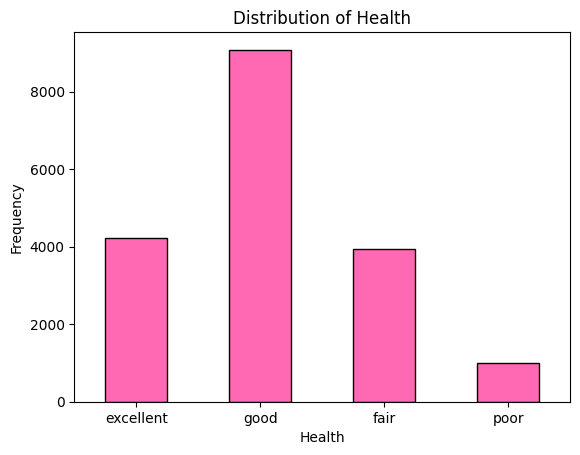

In [306]:
df['health'].value_counts().sort_index().plot(kind='bar',
                                              color='hotpink', edgecolor='black')
plt.title('Distribution of Health')
plt.xlabel('Health')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [303]:
df = df[df['health'] != 'unanswered']

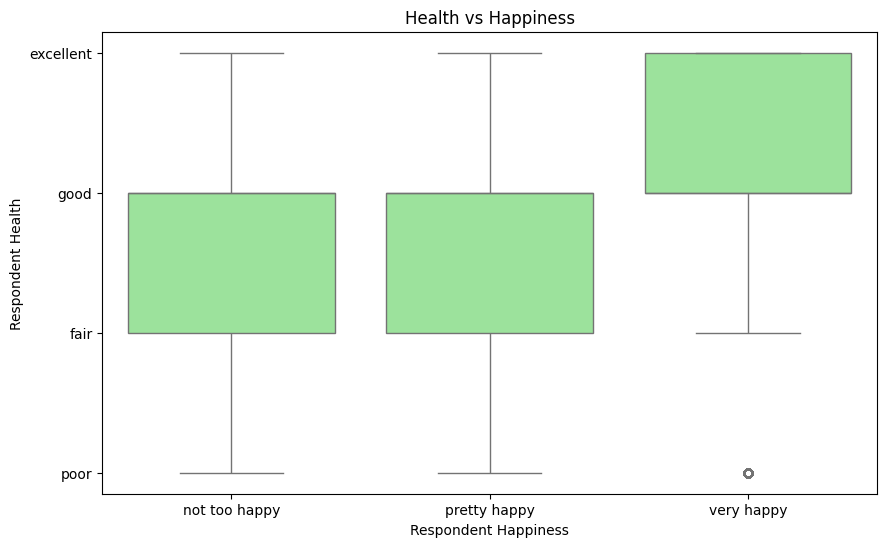

In [305]:
#  Graph of health v happiness
health_order = ['excellent', 'good', 'fair', 'poor']
happiness_order = ['not too happy', 'pretty happy', 'very happy']
df['health'] = pd.Categorical(df['health'], categories=health_order,
                              ordered=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='happy', y='health', data=df, order=happiness_order,
            hue_order=health_order, color="lightgreen")
plt.xlabel('Respondent Happiness')
plt.ylabel('Respondent Health')
plt.title('Health vs Happiness')
plt.show()